In [3]:
import os
import random
import numpy as np
import scipy.io
import matplotlib.pyplot as plt
import gc
import pandas as pd
import math

from sklearn.model_selection import train_test_split

from mlxtend.plotting import plot_decision_regions

%matplotlib inline

In [ ]:
os.mkdir('./dados')
os.mkdir('./img')

In [ ]:
pst_dados = os.path.abspath(os.path.relpath('./dados'))
pst_img = os.path.abspath(os.path.relpath('./img'))

In [51]:
microsoft = pd.read_csv('./dados/MSFT.csv')
google = pd.read_csv('./dados/GOOG.csv')
ibm = pd.read_csv('./dados/IBM.csv')
facebook = pd.read_csv('./dados/FB.csv')
oracle = pd.read_csv('./dados/ORCL.csv')
apple = pd.read_csv('./dados/AAPL.csv')

In [5]:
ibm.tail(10)
#google.Date[-100:]

,Date,Open,High,Low,Close,Adj Close,Volume
2758,2019-06-14,135.440002,135.880005,134.429993,135.149994,135.149994,2193300
2759,2019-06-17,135.389999,136.029999,134.699997,134.949997,134.949997,2194100
2760,2019-06-18,135.199997,137.190002,135.199997,136.380005,136.380005,2914700
2761,2019-06-19,136.429993,138.360001,136.240005,137.080002,137.080002,2382400
2762,2019-06-20,138.929993,139.539993,138.199997,138.850006,138.850006,3071000
2763,2019-06-21,138.440002,139.539993,138.389999,139.199997,139.199997,5288700
2764,2019-06-24,139.199997,140.149994,139.050003,139.350006,139.350006,2186000
2765,2019-06-25,139.460007,139.550003,138.130005,138.360001,138.360001,2801200
2766,2019-06-26,138.869995,139.679993,138.410004,138.520004,138.520004,2284600
2767,2019-06-27,138.720001,139.300003,137.949997,138.520004,138.520004,2149800


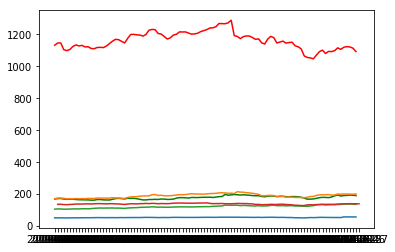

In [6]:
plt.plot(google.Date[-100:], google.High[-100:], color='red')
plt.plot(facebook.Date[-100:], facebook.High[-100:], color='green')
plt.plot(oracle.Date[-100:], oracle.High[-100:])
plt.plot(apple.Date[-100:], apple.High[-100:])
plt.plot(microsoft.Date[-100:], microsoft.High[-100:])
plt.plot(ibm.Date[-100:], ibm.High[-100:])

plt.show()

### Dividindo as bases em teste e treino na metade '0.5'

In [52]:
x_train_google, x_test_google, y_train_google, y_test_google = train_test_split(google['Date'], 
                                                                                google.drop('Date', axis=1), 
                                                                                test_size=0.5, 
                                                                                random_state=0)

x_train_facebook, x_test_facebook, y_train_facebook, y_test_facebook = train_test_split(facebook['Date'], 
                                                                                        facebook.drop('Date', axis=1), 
                                                                                        test_size=0.5, 
                                                                                        random_state=0)

x_train_ibm, x_test_ibm, y_train_ibm, y_test_ibm = train_test_split(ibm['Date'], 
                                                                    ibm.drop('Date', axis=1), 
                                                                    test_size=0.5,
                                                                    random_state=0)

x_train_oracle, x_test_oracle, y_train_oracle, y_test_oracle = train_test_split(oracle['Date'], 
                                                                                oracle.drop('Date', axis=1), 
                                                                                test_size=0.5,
                                                                                random_state=0)

x_train_apple, x_test_apple, y_train_apple, y_test_apple = train_test_split(apple['Date'], 
                                                                            apple.drop('Date', axis=1), 
                                                                            test_size=0.5,
                                                                            random_state=0)

x_train_microsoft, x_test_microsoft, y_train_microsoft, y_test_microsoft = train_test_split(microsoft['Date'], 
                                                                                            microsoft.drop('Date', axis=1), 
                                                                                            test_size=0.5,
                                                                                            random_state=0)

In [9]:
y_train_google.tail(5)

,Open,High,Low,Close,Adj Close,Volume
763,264.753052,267.087860,261.931396,264.276154,264.276154,9602400
835,291.772308,294.117065,287.738525,288.473755,288.473755,5901100
1653,518.625977,533.394714,516.855713,531.465332,531.465332,2676900
2607,1073.729980,1082.974976,1054.609985,1057.790039,1057.790039,1839000
2732,1180.469971,1190.439941,1161.040039,1174.099976,1174.099976,1551400


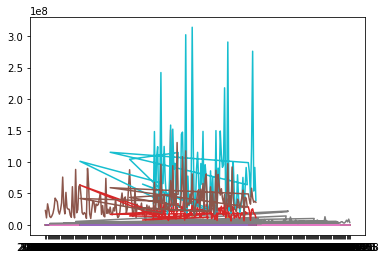

In [10]:
plt.plot(x_train_facebook[-100:], y_train_facebook[-100:])
plt.plot(x_train_google[-100:], y_train_google[-100:])
plt.plot(x_train_ibm[-100:], y_train_ibm[-100:])
plt.plot(x_train_oracle[-100:], y_train_oracle[-100:])
plt.plot(x_train_apple[-100:], y_train_apple[-100:])
plt.plot(x_train_microsoft[-100:], y_train_microsoft[-100:])

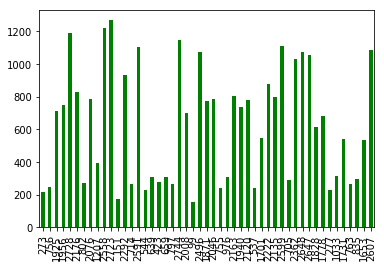

In [31]:
y_train_google.Close[-50:-1].plot.bar(color='red')
y_train_google.High[-50:-1].plot.bar(color='green')


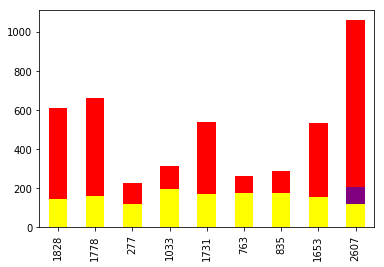

In [25]:
y_train_facebook.Close[-10:-1].plot.bar(color='green')
y_train_google.Close[-10:-1].plot.bar(color='red')
y_train_oracle.Close[-10:-1].plot.bar(color='blue')
y_train_apple.Close[-10:-1].plot.bar(color='purple')
y_train_microsoft.Close[-10:-1].plot.bar(color='orange')
y_train_ibm.Close[-10:-1].plot.bar(color='yellow')

In [ ]:
facebook_sem_vol = y_train_facebook.drop(['Volume', 'Adj Close', 'Open', 'Close'], axis =1).plot()

facebook_sem_vol.plot()
y_train_google.drop(['Volume', 'Adj Close', 'Open', 'Close'], axis =1).plot()
y_train_oracle.drop(['Volume', 'Adj Close', 'Open', 'Close'], axis =1).plot()
y_train_apple.drop(['Volume', 'Adj Close', 'Open', 'Close'], axis =1).plot()
y_train_ibm.drop(['Volume', 'Adj Close', 'Open', 'Close'], axis =1).plot()

In [38]:
google.hist()
plt.show

SyntaxError: keyword argument repeated (<ipython-input-38-07f239abe9dd>, line 1)

In [ ]:
google.hist(column='High', bins=100)
facebook.hist(column='High', bins=100)
plt.show

In [53]:
y_train_google.High[0]

263.28756699999997

In [54]:
y_train_google_pesos = y_train_google

In [55]:
y_train_google.rename(index=str, columns={"Adj Close": "Adj"}, inplace=True)
y_train_google_pesos.rename(index=str, columns={"Adj Close": "Adj"}, inplace=True)

In [56]:
y_train_google_pesos = y_train_google
y_train_facebook_pesos = y_train_facebook
y_train_ibm_pesos = y_train_ibm
y_train_apple_pesos = y_train_apple
y_train_microsoft_pesos = y_train_microsoft
y_train_oracle_pesos = y_train_oracle

In [57]:
y_train_google_pesos.High[226]

299.079773

In [58]:
y_train_google.High[226]

299.079773

In [338]:
for i in range(len(y_train_google)):
    if i in y_train_google.High:
        print('indice {},high do vetor real {}'.format(i, y_train_google.High[i]))

indice 0,high do vetor real 263.28756699999997
indice 3,high do vetor real 268.444031
indice 7,high do vetor real 276.044586
indice 8,high do vetor real 272.97454799999997
indice 12,high do vetor real 266.516571
indice 13,high do vetor real 266.789795
indice 16,high do vetor real 238.57330299999998
indice 21,high do vetor real 242.055664
indice 24,high do vetor real 235.081024
indice 25,high do vetor real 234.9767
indice 26,high do vetor real 238.48886099999999
indice 28,high do vetor real 240.436188
indice 29,high do vetor real 246.27322400000003
indice 32,high do vetor real 250.143066
indice 35,high do vetor real 253.35218799999998
indice 38,high do vetor real 243.36712599999998
indice 44,high do vetor real 233.98317000000003
indice 45,high do vetor real 239.53207400000002
indice 46,high do vetor real 235.61256400000002
indice 49,high do vetor real 225.006546
indice 50,high do vetor real 214.792984
indice 51,high do vetor real 210.8685
indice 56,high do vetor real 218.15113799999997


### multiplicando cada entrada por um peso

In [345]:
#y_train_google_pesos.High[237] = y_train_google.High[237]*5
y_train_google.High[237]

219.03538500000002

### testar com pesos menores como 0.5 0.2 0.3

In [ ]:

for i in range(len(y_train_google)):
    if i in y_train_google_pesos.High:
        print('high do vetor real ', y_train_google.High[i])
        y_train_google_pesos.High[i] = y_train_google.High[i]*5
        y_train_google_pesos.Low[i] = y_train_google.Low[i]*4
        y_train_google_pesos.Open[i] = y_train_google.Open[i]*3
        y_train_google_pesos.Close[i] = y_train_google.Close[i]*6
        y_train_google_pesos.Volume[i] = y_train_google.Volume[i]*2
        print('high do vetor multiplicado ', y_train_google_pesos.High[i])


### testar com pesos menores como 0.5 0.2 0.3

In [50]:
for i in range(len(y_train_google)):
    if i in y_train_google.High:
        print('high do vetor real ', y_train_google.High[i])
        y_train_google_pesos.High[i] = y_train_google.High[i]*0.5
        y_train_google_pesos.Low[i] = y_train_google.Low[i]*0.4
        y_train_google_pesos.Open[i] = y_train_google.Open[i]*0.3
        y_train_google_pesos.Close[i] = y_train_google.Close[i]*0.6
        y_train_google_pesos.Volume[i] = y_train_google.Volume[i]*0.2
        y_train_google_pesos.Adj[i] = y_train_google.Adj[i]*0.5
        print('high do vetor multiplicado ', y_train_google_pesos.High[i])

In [59]:
y_train_google_pesos.tail(5)

,Open,High,Low,Close,Adj,Volume
763,264.753052,267.087860,261.931396,264.276154,264.276154,9602400
835,291.772308,294.117065,287.738525,288.473755,288.473755,5901100
1653,518.625977,533.394714,516.855713,531.465332,531.465332,2676900
2607,1073.729980,1082.974976,1054.609985,1057.790039,1057.790039,1839000
2732,1180.469971,1190.439941,1161.040039,1174.099976,1174.099976,1551400


## arredondando

In [60]:
y_train_google_pesos.Low = y_train_google.Low.round(0)
y_train_google_pesos.Open = y_train_google.Open.round(0)
y_train_google_pesos.Close = y_train_google.Close.round(0)
y_train_google_pesos.Volume = y_train_google.Volume.round(0)
y_train_google_pesos.High = y_train_google.High.round(0)
y_train_google_pesos.Adj = y_train_google.Adj.round(0)


In [66]:
for i in range(len(y_train_google_pesos)):
    if i in y_train_google_pesos.High[i]:
        print('indice {},high do vetor real {}'.format(i, y_train_google_pesos.High[i]))
        print('indice {},high do vetor real {}'.format(i, y_train_google.High[i]))

TypeError: argument of type 'numpy.float64' is not iterable

In [63]:
for i in range(len(y_train_google)):
    if i in y_train_google.High:
        print('indice {},high do vetor real {}'.format(i, y_train_google.High[i]))

### média de cada coluna

In [64]:
teste = round(y_train_google[:10],0)
teste.shape
teste.mean(axis=0)

Open          539.7
High          547.7
Low           535.7
Close         543.0
Adj           543.0
Volume    6073080.0
dtype: float64

In [68]:
teste = round(y_train_google_pesos[:10],0)
teste.shape
teste.mean(axis=0)

Open          539.7
High          547.7
Low           535.7
Close         543.0
Adj           543.0
Volume    6073080.0
dtype: float64

In [70]:
round(y_train_google.High.mean(axis=0),0)

558.0

In [71]:
round(y_train_google.Low.mean(axis=0),0)

548.0

In [72]:
round(y_train_google.Close.mean(axis=0),0)

553.0

In [73]:
round(y_train_google.Volume.mean(axis=0),0)

4168579.0

In [74]:
round(y_train_google.Adj.mean(axis=0),0)

553.0

### Média de cada atributo

In [76]:
google_media_high = y_train_google.High.mean(axis=0)
google_media_open = y_train_google.Open.mean(axis=0)
google_media_low = y_train_google.Low.mean(axis=0)
google_media_close = y_train_google.Close.mean(axis=0)
google_media_adj = y_train_google.Adj.mean(axis=0)
google_media_volume = y_train_google.Volume.mean(axis=0)

In [77]:
google_media_high

558.0729768786127

In [78]:
google_media_open

553.2940751445087

In [79]:
google_media_low

548.1047687861271

In [80]:
google_media_close

553.2030346820809

In [81]:
google_media_adj

553.2030346820809

In [82]:
google_media_volume

4168579.3352601156

In [88]:
media_somatoria_medias = (google_media_high+google_media_open+google_media_low+google_media_close+google_media_adj+google_media_volume)/6
media_somatoria_medias

695224.2021917148

## Tentado regualar a sigmoid

In [90]:
def sigmoid(x):
  return 1 / (1 + math.exp(-x))

In [99]:
sigmoid(google_media_close*0.001)

0.6348783997624317

In [463]:
sigmoid(round(google_media_high,0))

1.0

In [470]:
sigmoid(round(50,0))

1.0

## ARRUMAR ESSA BOSTA a sigmoid

In [101]:
## USANDO O ITENS PARA CALCULAR SIGMOID

In [115]:
for itens in y_train_google_pesos.Close:
    
    conector_peso = itens*0.008
    sigmoid = (1 / (1 + (math.exp(-conector_peso))))

    print ('O valor de itens e: {}',format(-itens))
    print ('O valor da sigmoid é: {}',format(sigmoid))

O valor de itens e: {} -165.0
O valor da sigmoid é: {} 0.789181706522253
O valor de itens e: {} -823.0
O valor da sigmoid é: {} 0.9986195991548301
O valor de itens e: {} -552.0
O valor da sigmoid é: {} 0.9880617775461034
O valor de itens e: {} -1025.0
O valor da sigmoid é: {} 0.9997254218438986
O valor de itens e: {} -248.0
O valor da sigmoid é: {} 0.8791069189460684
O valor de itens e: {} -606.0
O valor da sigmoid é: {} 0.9922170002673092
O valor de itens e: {} -298.0
O valor da sigmoid é: {} 0.9155990582652731
O valor de itens e: {} -309.0
O valor da sigmoid é: {} 0.92215545568493
O valor de itens e: {} -1220.0
O valor da sigmoid é: {} 0.9999422887086502
O valor de itens e: {} -184.0
O valor da sigmoid é: {} 0.8133611858632266
O valor de itens e: {} -407.0
O valor da sigmoid é: {} 0.9628881166962792
O valor de itens e: {} -302.0
O valor da sigmoid é: {} 0.9180392747125928
O valor de itens e: {} -787.0
O valor da sigmoid é: {} 0.9981597281380994
O valor de itens e: {} -738.0
O valor d

O valor de itens e: {} -440.0
O valor da sigmoid é: {} 0.97125150407346
O valor de itens e: {} -211.0
O valor da sigmoid é: {} 0.8439609593084825
O valor de itens e: {} -438.0
O valor da sigmoid é: {} 0.9708013673158152
O valor de itens e: {} -442.0
O valor da sigmoid é: {} 0.9716949036890725
O valor de itens e: {} -244.0
O valor da sigmoid é: {} 0.875664557746637
O valor de itens e: {} -563.0
O valor da sigmoid é: {} 0.9890564373768954
O valor de itens e: {} -1079.0
O valor da sigmoid é: {} 0.9998217241149921
O valor de itens e: {} -307.0
O valor da sigmoid é: {} 0.920999113515201
O valor de itens e: {} -763.0
O valor da sigmoid é: {} 0.9977710650816434
O valor de itens e: {} -290.0
O valor da sigmoid é: {} 0.9105199406664386
O valor de itens e: {} -296.0
O valor da sigmoid é: {} 0.9143543693898266
O valor de itens e: {} -1173.0
O valor da sigmoid é: {} 0.9999159487692176
O valor de itens e: {} -215.0
O valor da sigmoid é: {} 0.8481288363433407
O valor de itens e: {} -434.0
O valor da

O valor de itens e: {} -512.0
O valor da sigmoid é: {} 0.9836332294514805
O valor de itens e: {} -321.0
O valor da sigmoid é: {} 0.928773502754956
O valor de itens e: {} -240.0
O valor da sigmoid é: {} 0.8721384336809187
O valor de itens e: {} -296.0
O valor da sigmoid é: {} 0.9143543693898266
O valor de itens e: {} -547.0
O valor da sigmoid é: {} 0.9875806202676918
O valor de itens e: {} -768.0
O valor da sigmoid é: {} 0.997858275687917
O valor de itens e: {} -224.0
O valor da sigmoid é: {} 0.8571723073604134
O valor de itens e: {} -1065.0
O valor da sigmoid é: {} 0.999800600342789
O valor de itens e: {} -192.0
O valor da sigmoid é: {} 0.8228824903813154
O valor de itens e: {} -434.0
O valor da sigmoid é: {} 0.9698804980864881
O valor de itens e: {} -165.0
O valor da sigmoid é: {} 0.789181706522253
O valor de itens e: {} -662.0
O valor da sigmoid é: {} 0.9950133906243005
O valor de itens e: {} -339.0
O valor da sigmoid é: {} 0.9377310339935125
O valor de itens e: {} -622.0
O valor da 

In [ ]:
for i in media:
    print ('O valor de itens e: {}',format(-i))
    print ('O valor da sigmoid é: {}',format(sigmoid(i)))

In [ ]:
lista1 = [1, 2, 3]

In [ ]:
lista1[0]

In [ ]:
lista2 = [[1,2,3], [4,5,6], [7,8,9]]

In [ ]:
lista2[2][2]

In [ ]:
lista2[0][1]

In [ ]:
import random
cidades = ['Salto', 'Itu', 'Sorocaba', 'Campinas']
escolhido = random.choice(cidades)
escolhido

In [ ]:
a = [1,2,3]

In [ ]:
a.append(44)

In [ ]:
a

In [ ]:
b = [5,6,88]

In [ ]:
for item in b:
    a.append(item)
a

In [ ]:
### lambda

In [ ]:
media = lambda n1, n2, n3: (n1+n2+n3)/3

In [ ]:
media(5, 8, 10)

## Estruturas de repetição de listas

In [ ]:
kmH = [1,10,20,30,50,70,55,34,90,16,74]
print (kmH)

mH = []

for kms in kmH:
    mH.append(kms/1.61)
    
print (mH)

### usando map

In [ ]:
#list para que os resultados da func lambida se tornem uma lista tambem, pois os dados originais s~ao de uma lista

mph2 = list(map(lambda x: x/1.61, kmH)) #aplica a divisão para todos os itens de kmH usando a virgula para dividir

print (mph2)

### list comprehension

In [ ]:
#igual ao map e ao for anteriores

mph3 = [x/1.61 for x in kmH] #faz x/1.61 para todos os itens da lista kmH
print (mph3)

In [ ]:
# com string
texto = [char for char in 'Teste de list comprehension']
print(texto)

In [ ]:
kmH

In [ ]:
plt.plot(mph3)
plt.show()

In [ ]:
plt.plot(kmH)
plt.show()

# TESTES COM NUNPY

In [ ]:
a = np.array([1,2,3])
a

In [ ]:
b = np.array([(2,6,9), (8,2,4), (8,2,5), (1,2,3), (9,8,7)]) #isso é uma matriz, cada um representa uma linha
b

In [ ]:
zero = np.zeros((10,8))
zero

In [ ]:
um = np.ones((5,5))
um

In [ ]:
# elementos na DIAGONAL da matriz
d = np.eye(10)
d

In [ ]:
b.max()

In [ ]:
b.min()

In [ ]:
b.sum()

In [ ]:
b.mean()

In [ ]:
b.std() #desvio padrão std=standard, padrão

### testes pyplot

In [118]:
import pandas as pd
import numpy as np

dados = pd.DataFrame(np.random.randint(0,100, size=(100, 5)), columns=list('ABCDE'))

In [119]:
dados.tail(5)

,A,B,C,D,E
95,85,13,85,47,35
96,46,77,3,15,97
97,15,65,79,30,55
98,27,49,77,85,43
99,90,37,14,78,34


In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

x = dados.loc[1:10, 'A'] #das linhas 1 ate 9

dados.insert(2, "data", 12)

col = dados[['A']]
row = dados[0:]


In [ ]:
for i in range(len(dados))
    dados[['A']]

In [151]:
dados[0:10, ['A']]

TypeError: '(slice(0, 10, None), ['A'])' is an invalid key

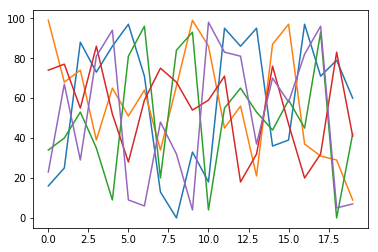

In [139]:
plt.plot(row)
plt.show()